# State transition matrix
This script illustrates the concept of the Markov property, i.e. only the current state of the system determines what happens the next step ahead. This script departs from a time series representing the evolution of the state of a system. In its most simple scenario, the system is just up or down, but the script is easily extendable to multiple state systems. The script provides various sample time series to illustrate some practical issues.

The script illustrates the construction of the state transition matrix from a time series of system states. The rows in this state transition matrix represent the current state and the columns represent the next step ahead state. Below is the state transition matrix of a 4-state system. Each row in the state transition matrix should sum up to one.

|             | up/up     | up/down   | down/up | down/down  |
|:-----------:|----------:|----------:|--------:|-----------:|
|up/up        |    0.50   |    0.33   |   0.17  |   0.00     |
|up/down      |    0.25   |    0.25   |   0.00  |   0.50     |
|down/up      |    0.50   |    0.00   |   0.25  |   0.25     |
|down/down    |    0.00   |    0.33   |   0.67  |   0.00     |

Particularly in case of multiple state systems, it is often impossible to construct a state transition matrix from a time series of observations. Failures typically (and hopefully!) rarely occur and some system states may therefore remain absent in the time series. Then, the state transition matrix cannot be constructed from a time series of observations. Then, expert judgement is needed to load the state transition matrix. Reliability handbooks may be helpful here.

![image](figures/StateTransitionPlot01.png).

The main output of this script is a graph that plots the probability of an upstate of the system. In case of multiple state systems, a definition of the system's upstate needs to be specified. In this picture, both components should be up for the system to be up or just one of the two components should be up for the system to be up. So, the effect of various configurations on the probability of the upstate may be evaluated.

![image](figures/StateTransitionPlot02.png).
![image](figures/StateTransitionPlot02.png).

Both pictures have been built on the same time series, but in the first picture this time series has been decomposed in 10 steps and in the second one, it has been decomposed in 60 steps. Then, the number of state transitions in the time series did not change, but the number of state holdings grows by a factor 6 as shown in the state transition matrix below.

|             | up/up     | up/down   | down/up | down/down  |
|:-----------:|----------:|----------:|--------:|-----------:|
|up/up        |    0.93   |    0.05   |   0.17  |   0.00     |
|up/down      |    0.04   |    0.88   |   0.00  |   0.08     |
|down/up      |    0.08   |    0.00   |   0.88  |   0.04     |
|down/down    |    0.00   |    0.06   |   0.11  |   0.83     |

Although both graphs end at similar probabilities of an upstate, the resolution of the second graph is more accurate. This idea can be stretched to a decomposition into infinitely many time intervals. If the number of system states is small, an equation for the evolution of the probability of the upstate can be derived.



In [1]:
#import some libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#this sample represents the evolution of the system states in time

#this sample represents a non repairable system, i.e. it assesses reliability
#sample =["up","up","up","up","down","down"]

#this sample represents a repairable system, i.e. it assesses availability 
#sample =["up","up","up","up","down","down","up"]

#this sample represents a repairable multiple state system, i.e. it assesses availability of some configuration
sample =["up/up","up/up","up/down","up/up","down/up","up/up","up/down","up/down","down/down","up/down","down/down","down/up","down/down","down/up","down/up","up/up","up/up","up/up"]

#this is an incomplete sample as the transitions from down/down have not been observed
#sample =["up/up","up/up","up/down","up/up","down/up","up/up","up/down","up/down","up/down","up/up","down/up","down/up","down/down"]

#this sample represents a repairable multiple state system at a higher time resolution, i.e. it assesses availability of some configuration
#sample =["up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up",
 #        "up/down","up/down","up/down","up/down","up/down","up/down","up/up","up/up","up/up","up/up","up/up","up/up",
  #       "down/up","down/up","down/up","down/up","down/up","down/up","up/up","up/up","up/up","up/up","up/up","up/up",
   #      "up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down",
    #     "down/down","down/down","down/down","down/down","down/down","down/down","up/down","up/down","up/down","up/down","up/down","up/down",
     #    "down/down","down/down","down/down","down/down","down/down","down/down","down/up","down/up","down/up","down/up","down/up","down/up",
      #   "down/down","down/down","down/down","down/down","down/down","down/down","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up",
       #  "up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up"]

#print("survey of state transitions: \n",tuple(zip(sample,sample[1:])),"\n")

In [9]:
#define state transition matrix

n=pd.DataFrame(sample)[0].unique()
n=n.tolist()
n.sort(reverse=True)
#print("survey of the unique states in the sample, sorted descending: ",n)

tm=pd.DataFrame(0,columns=n,index=n)
#print("empty state transition matrix: \n",tm)

In [10]:
# load the state transition matrix 

for (i,j) in zip(sample,sample[1:]):
    tm.loc[i,j] += 1
    
tm=tm.apply(lambda x: x/x.sum(), axis="columns")

#print("print the transition matrix, the proportions in each row sum up to one:\n", tm)

In [11]:
#define the initial state of the system

s = pd.Series(0,index=n)
s[0]=1
#print("check whether the values in this series add up to one:\n",s)

#calculate the evolution of the system states in time

t=10 #define the time interval of interest

em=pd.DataFrame()

for i in range(t):
    em=em.append(s,ignore_index=True)
    s=tm.T.dot(s.T)
    
#print("the evolution matrix, given the initial state and the state transition matrix:\n",em)


In [12]:
#add a columns that defines the upstate of the system

sem=em.copy()
sem["up_system_1"]=em.iloc[:,len(em.iloc[0,:])-1]
sem["up_system_2"]=1-em.iloc[:,0]

#print("the evolution of the upstate by two definitions:\n",sem)

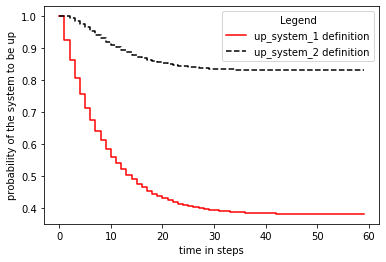

In [13]:
#plot the system upstate in a graph

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1) # one row, one column, first plot

line, = ax1.step(sem.index,
         sem["up_system_1"],
         where="post",
        label="up_system_1 definition",
        color="red")

line, = ax1.step(sem.index,
         sem["up_system_2"],
         where="post",
        label="up_system_2 definition",
        color="black",
        linestyle="dashed")

xtext = ax1.set_xlabel('time in steps') # returns a Text instance
ytext = ax1.set_ylabel('probability of the system to be up')

plt.legend(title='Legend')
#plt.savefig("C:/Users/Chris/Pythonprojects/RAMS/figures/StateTransitionPlot02.png")
#plt.show()